# Image Data Analysis Using Python: 

### This tutorial takes a look at how to import images and observe it's properties, split the layers, and also looks at greyscale.
### Contents :
 - Introduction: A Little Bit About Pixel
 - Observe Basic Properties of Image
 - Greyscale
 - Use Logical Operator To Process Pixel Values
 - Masking
 - Image Processing

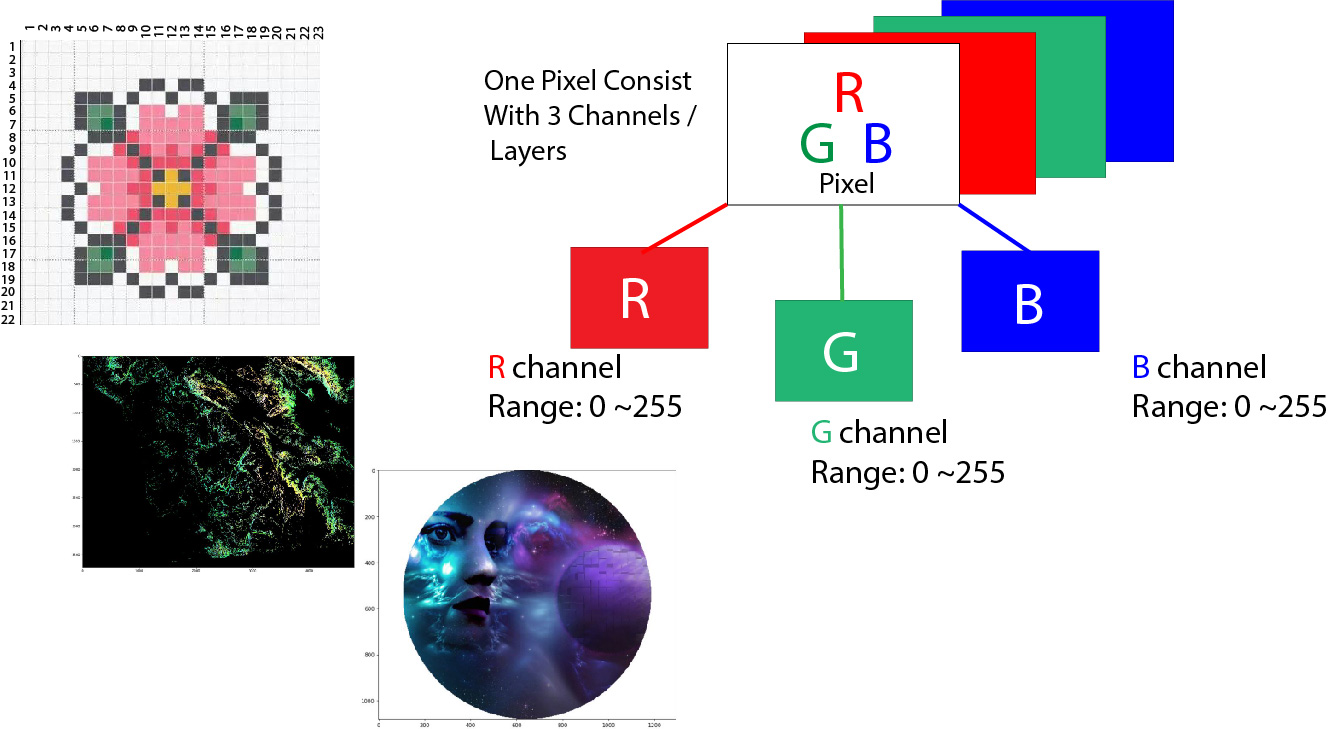

## Introduction: A Little Bit About Pixel

Computers store images as a mosaic of tiny squares. This is like the ancient art form of tile mosaic, or the melting bead kits kids play with today. Now, if these square tiles are too big, it’s then hard to make smooth edges and curves. The more and smaller tiles we use, the smoother or as we say less pixelated, the image will be. These sometimes get referred to as resolution of the images.

Vector graphics are a somewhat different method of storing images that aims to avoid pixel related issues. But even vector images, in the end, are displayed as a mosaic of pixels. The word pixel means a picture element. A simple way to describe each pixel is using a combination of three colors, namely Red, Green, Blue. This is what we call an RGB image.

Every photograph, in digital form, is made up of pixels. They are the smallest unit of information that makes up a picture. Usually round or square, they are typically arranged in a 2-dimensional grid.

Now, if all three values are at full intensity, that means they’re 255. It then shows as white, and if all three colors are muted, or has the value of 0, the color shows as black. The combination of these three will, in turn, give us a specific shade of the pixel color. Since each number is an 8-bit number, the values range from 0-255.

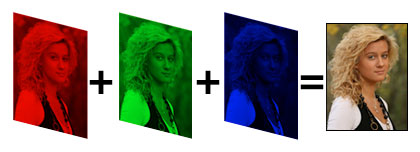

The combination of these three colors tends to the highest value among them. Since each value can have 256 different intensity or brightness value, it makes 16.8 million total shades.

## Importing Image

Now let’s load an image and observe its various properties in general.

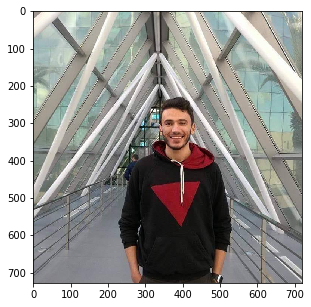

In [19]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
pic = imageio.imread('images/me.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)

## Observe Basic Properties of Image

In [20]:
print('Type of the image : ' , type(pic))

print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (728, 720, 3)
Image Hight 728
Image Width 720
Dimension of Image 3


The shape of the ndarray shows that it is a three-layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green, Blue. So, if we calculate the size of an RGB image, the total size will be counted as height x width x 3

In [22]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1572480
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [23]:
# A specific pixel located at Row : 100 ; Column : 50 

# Each channel's value of it, gradually R , G , B

print('Value of only R channel {}'.format(pic[ 100, 50, 0]))
print('Value of only G channel {}'.format(pic[ 100, 50, 1]))
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 168
Value of only G channel 189
Value of only B channel 182


Okay, now let’s take a quick view of each channel in the whole image.

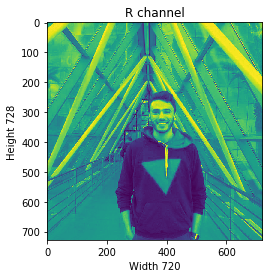

In [24]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 0])
plt.show()

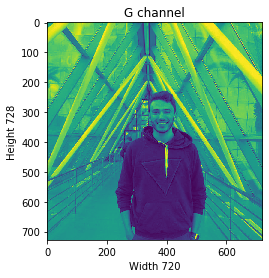

In [25]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 1])
plt.show()

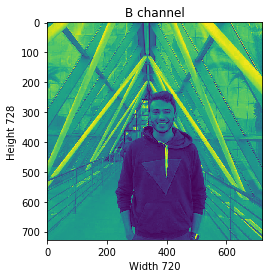

In [26]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 2])
plt.show()

Now, we can also able to change the number of RGB values. As an example, let’s set the Red, Green, Blue layer for following Rows values to full intensity.
 - R channel: Row — 100 to 110
 - G channel: Row — 200 to 210
 - B channel: Row — 300 to 310
 
We’ll load the image once so that we can visualize each change simultaneously.

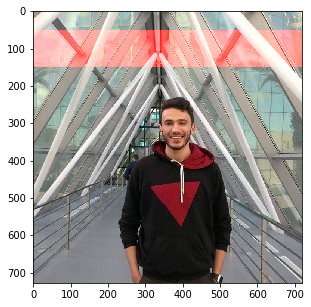

In [28]:
pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

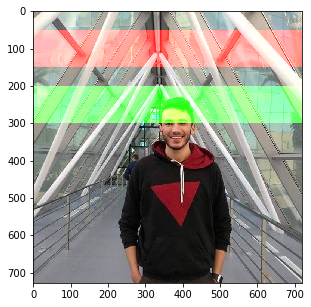

In [29]:
pic[200:300 , : , 1] = 255 # full intensity to those pixel's G channel
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

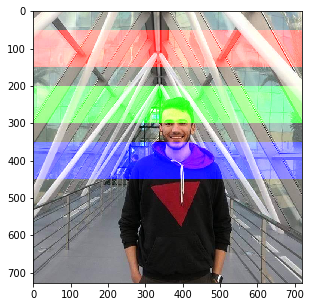

In [31]:
pic[350:450 , : , 2] = 255 # full intensity to those pixel's B channel
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

To make it more clear let’s change the column section too and this time we’ll change the RGB channel simultaneously.

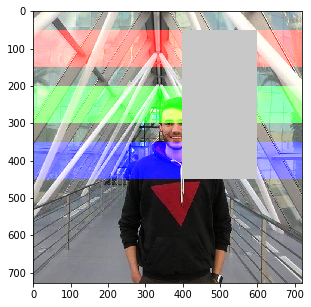

In [33]:
# set value 200 of all channels to those pixels which turns them to white
pic[ 50:450 , 400:600 , [0,1,2] ] = 200 
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

## Splitting Layers

Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.

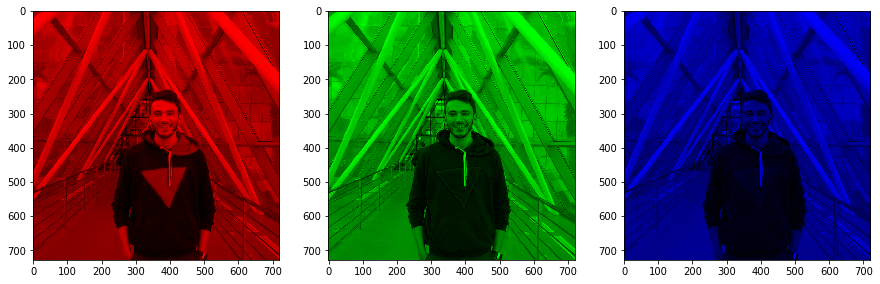

In [34]:
import numpy as np
pic = imageio.imread('images/me.jpg')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
    

## Greyscale

Black and white images are stored in 2-Dimensional arrays. There’re two types of black and white images:

    - Binary: Pixel is either black or white:0 or 255
    - Greyscale: Ranges of shades of grey:0 ~ 255


Now, Greyscaling is a process by which an image is converted from a full color to shades of grey. In image processing tools, for example: in OpenCV, many functions use greyscale images before processing, and this is done because it simplifies the image, acting almost as noise reduction and increasing processing time as there’s less information in the images.

There are a couple of ways to do this in python to convert an image to grayscale, but a straightforward way of using matplotlib is to take the weighted mean of the RGB value of original image using this formula.


## Y' = 0.299 R + 0.587 G + 0.114 B

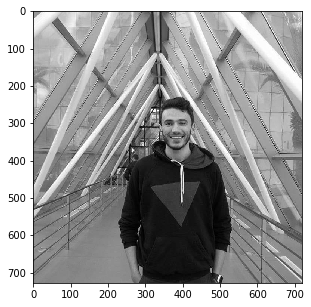

In [35]:
pic = imageio.imread('images/me.jpg')
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 

gray = gray(pic)
plt.figure( figsize = (5,5))

plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

## Use Logical Operator To Process Pixel Values

We can create a bullion ndarray in the same size by using a logical operator. However, this won’t create any new arrays, but it simply returnsTrue to its host variable. For example, let’s consider we want to filter out some low-value pixels or high-value or (any condition) in an RGB image, and yes, it would be great to convert RGB to grayscale, but for now, we won’t go for that rather than deal with a color image.

Let’s first load an image and show it on screen.

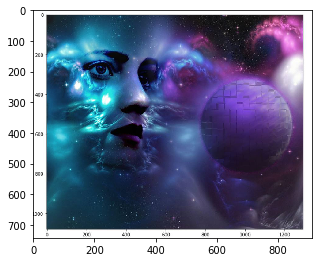

In [38]:
pic = imageio.imread('images/logic_op_pic.JPG')
plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.show()

let’s consider this dump image. Now, for any case, we want to filter out all the pixel values, which is below than, let’s assume, 20. For this, we’ll use a logical operator to do this task, which we’ll return as a value of True for all the index.

In [41]:
low_pixel = pic < 20

# to ensure of it let's check if all values in low_pixel are True or not
if low_pixel.any() == True:
    print(low_pixel.shape)

(743, 911, 3)


Now as we said, a host variable is not traditionally used, but I refer it because it behaves. It just holds the True value and nothing else. So, if we see the shape of both low_pixel and pic , we’ll find that both have the same shape.

In [42]:
print(pic.shape)
print(low_pixel.shape)

(743, 911, 3)
(743, 911, 3)


We generated that low-value filter using a global comparison operator for all the values less than 200. However, we can use this low_pixel array as an index to set those low values to some specific values, which may be higher than or lower than the previous pixel value.

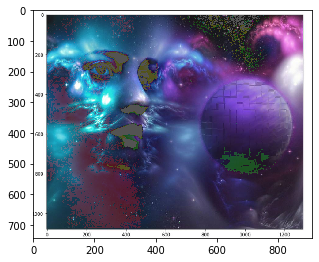

In [43]:
# randomly choose a value 
import random

# load the orginal image

pic = imageio.imread('images/logic_op_pic.JPG')

# set value randomly range from 25 to 225 - these value also randomly choosen
pic[low_pixel] = random.randint(25,225)
# display the image
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

## Masking

Image masking is an image processing technique that is used to remove the background from which photographs those have fuzzy edges, transparent or hair portions.

Now, we’ll create a mask that is in shape of a circular disc. First, we’ll measure the distance from the center of the image to every border pixel values. And we take a convenient radius value, and then using logical operator, we’ll create a circular disc. It’s quite simple, let’s see the code.

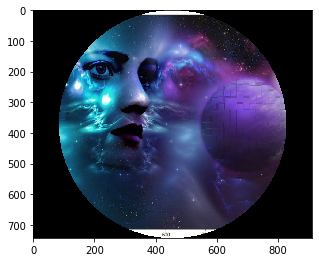

In [49]:
# Load the image
pic = imageio.imread('images/logic_op_pic.JPG')

# seperate the row and column values

total_row , total_col , layers = pic.shape

'''
    Create vector.
    Ogrid is a compact method of creating a multidimensional
    ndarray operations in single lines.
    for ex:
    >>> ogrid[0:5,0:5]
    output: [array([[0],
                    [1],
                    [2],
                    [3],
                    [4]]), 
            array([[0, 1, 2, 3, 4]])]

'''
x , y = np.ogrid[:total_row , :total_col]

# get the center values of the image
cen_x , cen_y = total_row/2 , total_col/2

'''
    Measure distance value from center to each border pixel.
    To make it easy, we can think it's like, we draw a line from center-
    to each edge pixel value --> s**2 = (Y-y)**2 + (X-x)**2 
'''
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)

# Select convenient radius value
radius = (total_row/2)

# Using logical operator '>' 
'''
logical operator to do this task which will return as a value 
of True for all the index according to the given condition
'''
circular_pic = distance_from_the_center > radius

'''
let assign value zero for all pixel value that outside the cirular disc.
All the pixel value outside the circular disc, will be black now.
'''
pic[circular_pic] = 0
plt.figure(figsize = (5,5))
plt.imshow(pic) 
plt.show()

## Image Processing


One of MOOC course on edX, we’ve introduced with some satellite images and its processing system. It’s very informative of course. However, let’s do a few analysis tasks on it

There’s something interesting about this image. Like many other visualizations, the colors in each RGB layer mean something. For example, the intensity of the red will be an indication of altitude of the geographical data point in the pixel. The intensity of blue will indicate a measure of aspect, and the green will indicate slope. These colors will help communicate this information in a quicker and more effective way rather than showing numbers.

    Red pixel indicates: Altitude
    Blue pixel indicates: Aspect
    Green pixel indicates: Slope

There is, by just looking at this colorful image, a trained eye that can tell already what the altitude is, what the slope is, and what the aspect is. So, that’s the idea of loading some more meaning to these colors to indicate something more scientific.

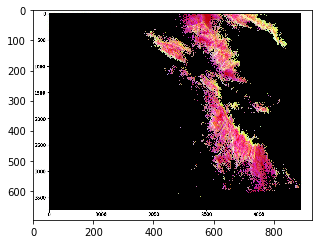

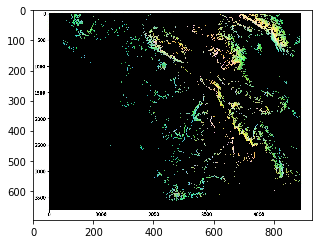

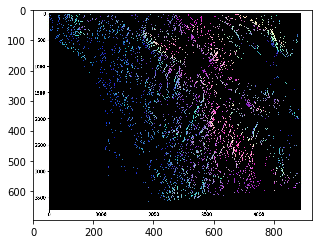

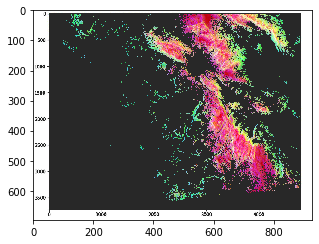

In [50]:
# Only Red Pixel value , higher than 180
pic = imageio.imread('images/sat_img.JPG')
red_mask = pic[:, :, 0] < 180
pic[red_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Only Green Pixel value , higher than 180
pic = imageio.imread('images/sat_img.JPG')
green_mask = pic[:, :, 1] < 180
pic[green_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)
# Only Blue Pixel value , higher than 180
pic = imageio.imread('images/sat_img.JPG')
blue_mask = pic[:, :, 2] < 180
pic[blue_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)
# Composite mask using logical_and
pic = imageio.imread('images/sat_img.JPG')
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(5,5))
plt.imshow(pic)